# Setup

In [43]:
from scipy.io import wavfile
import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.fft import fftshift
import sys

#KYW inst
fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/KYW Inst.wav')
#ATF Drums
#fs, data = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Sound Examples/Around the fur drums.wav')

# Get the bit depth of the audio data (assumes audio_data is a NumPy array)
bit_depth = data.dtype.itemsize * 8

# Calculate the scaling factor for normalization
scaling_factor = 2 ** (bit_depth - 1)  # For signed audio

# Convert audio data to floating-point values and normalize
data = data.astype(np.float32) / scaling_factor

# Verify that the data is now in the range -1 to 1
print(f"Min Value: {np.min(data)}")
print(f"Max Value: {np.max(data)}")

Min Value: -0.9484677314758301
Max Value: 0.9998999834060669


# Using balloon pop recorded in lobby as an impulse response for convolution reverb

In [15]:
# Loading IR
#Lobby Balloon Pop
fs_IR, balloon_pop_lobby = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Impulse Responses/Recorded Responses/Parish Hall/Lobby_Balloon.wav')

bit_depth_IR = balloon_pop_lobby.dtype.itemsize * 8

scaling_factor_IR = 2 ** (bit_depth_IR - 1)  

balloon_pop_lobby = balloon_pop_lobby.astype(np.float32) / scaling_factor_IR


/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_8871/2204451484.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_IR, balloon_pop_lobby = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Impulse Responses/Recorded Responses/Parish Hall/Lobby_Balloon.wav')


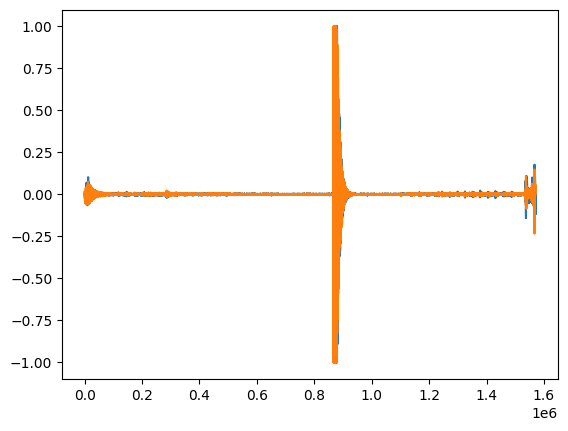

In [16]:
plt.plot(balloon_pop_lobby)

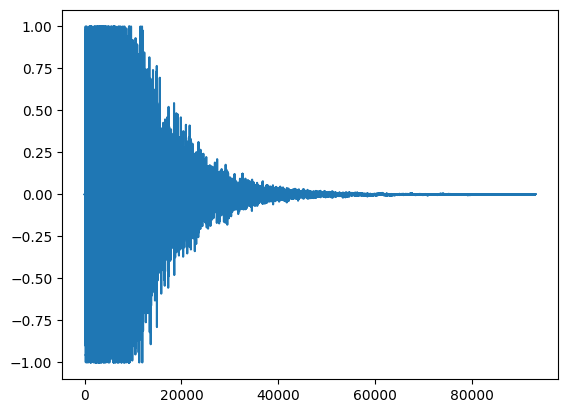

In [17]:
# Isolating the pop from the rest of the recording
plt.plot(balloon_pop_lobby[int(len(balloon_pop_lobby)/2)+81800:int(len(balloon_pop_lobby)/2)+175000,0])
isolated_pop_lobby = balloon_pop_lobby[int(len(balloon_pop_lobby)/2)+81800:int(len(balloon_pop_lobby)/2)+175000,:]

In [18]:
#sd.play(isolated_pop_lobby, fs_IR)

In [19]:
# Convolution with IR
data_L_conv_lobby = np.convolve(data[:,0], isolated_pop_lobby[:,0])
data_R_conv_lobby = np.convolve(data[:,1], isolated_pop_lobby[:,1])


#Normalising and outputting
data_L_conv_lobby = ((data_L_conv_lobby - np.min(data_L_conv_lobby)) / (np.max(data_L_conv_lobby) - np.min(data_L_conv_lobby))) * 2 - 1
data_R_conv_lobby = ((data_R_conv_lobby - np.min(data_R_conv_lobby)) / (np.max(data_R_conv_lobby) - np.min(data_R_conv_lobby))) * 2 - 1

data_conv_IR_lobby = np.vstack((data_L_conv_lobby, data_R_conv_lobby))
data_conv_IR_lobby = data_conv_IR_lobby.T

In [33]:
sd.play(data_conv_IR_lobby, fs)

# Using Balloon pop recorded in the Hall as an impulse response for convolution reverb

In [21]:
#Hall Balloon Pop
fs_IR, balloon_pop_hall = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Impulse Responses/Recorded Responses/Parish Hall/Hall_Balloon.wav')

bit_depth_IR = balloon_pop_hall.dtype.itemsize * 8

scaling_factor_IR = 2 ** (bit_depth_IR - 1)  

balloon_pop_hall = balloon_pop_hall.astype(np.float32) / scaling_factor_IR

/var/folders/wl/6gyc0yz53snb8mbsbvf6rnh80000gn/T/ipykernel_8871/1125016235.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs_IR, balloon_pop_hall = wavfile.read('/Users/kevinbrennan/Desktop/Final Project/Music-Technology-Final-Project/Impulse Responses/Recorded Responses/Parish Hall/Hall_Balloon.wav')


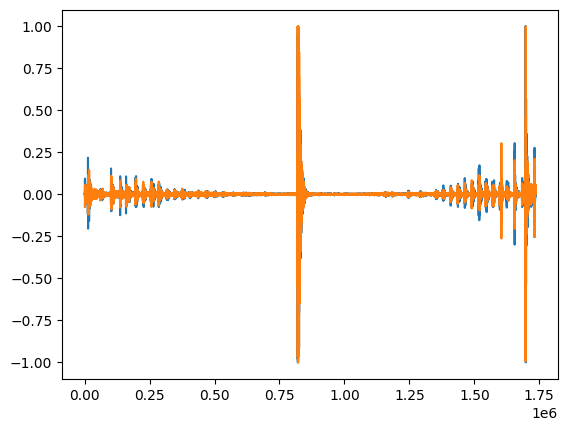

In [22]:
plt.plot(balloon_pop_hall)

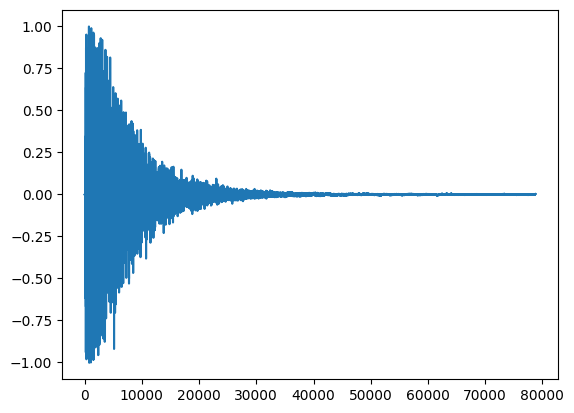

In [23]:
# Isolating the pop from the rest of the recording
plt.plot(balloon_pop_hall[int(len(balloon_pop_hall)/4)+386200:int(len(balloon_pop_hall)/4)+465000,0])
isolated_pop_hall = balloon_pop_hall[int(len(balloon_pop_hall)/4)+386200:int(len(balloon_pop_hall)/4)+465000,:]

In [24]:
#sd.play(isolated_pop_hall, fs)

In [44]:
# Convolution with IR
data_L_conv_hall = np.convolve(data[:,0], isolated_pop_hall[:,0])
data_R_conv_hall = np.convolve(data[:,1], isolated_pop_hall[:,1])


#Normalising and outputting
data_L_conv_hall = ((data_L_conv_hall - np.min(data_L_conv_hall)) / (np.max(data_L_conv_hall) - np.min(data_L_conv_hall))) * 2 - 1
data_R_conv_hall = ((data_R_conv_hall - np.min(data_R_conv_hall)) / (np.max(data_R_conv_hall) - np.min(data_R_conv_hall))) * 2 - 1

data_conv_IR_hall = np.vstack((data_L_conv_hall, data_R_conv_hall))
data_conv_IR_hall = data_conv_IR_hall.T

In [26]:
#sd.play(data_conv_IR_hall, fs)

# Processing using FFT instead

In [27]:
from scipy.fft import fft, fftfreq, rfft, rfftfreq, ifft, irfft
from scipy.signal.windows import blackman
N = 256

# Complex numbers
datafft = fft(data[0:N,0])
xfft = fftfreq(N, 1/fs)

# Real numbers only
rdatafft = rfft(data[0:N,0])
rxfft = rfftfreq(N, 1/fs)

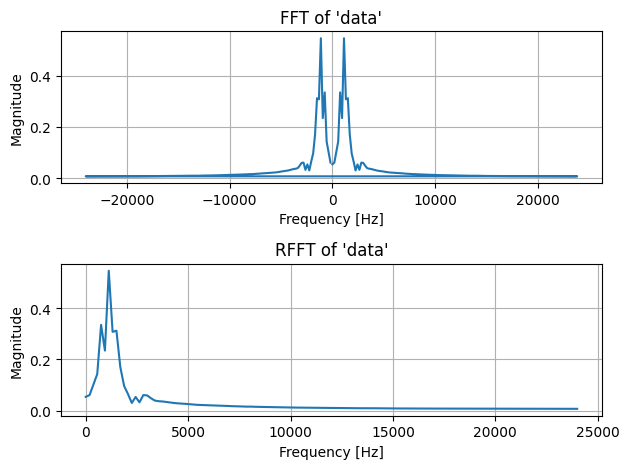

In [28]:
plt.figure()
plt.subplot(2,1,1)
plt.plot(xfft, np.abs(datafft))
plt.grid(which='both')
#plt.xscale('log')  # Set x-axis to a logarithmic scale
#plt.xlim([0, fs/2])  # Set x-axis limits
plt.title('FFT of \'data\'')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.subplot(2,1,2)
plt.plot(rxfft, np.abs(rdatafft))
plt.grid(which='both')
#plt.xscale('log')  # Set x-axis to a logarithmic scale
#plt.xlim([0, fs/2])  # Set x-axis limits
plt.title('RFFT of \'data\'')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

In [45]:
# https://ses.library.usyd.edu.au/handle/2123/8215
lendrysig= len(data[:,0])
lenir = len(isolated_pop_lobby[:,0])
outputlength = lendrysig + lenir - 1 # Matches Duration of IR and Input

outputL = irfft(rfft(data[:,0], outputlength) * rfft(isolated_pop_lobby[:,0], outputlength))
#ransforms from time domain to frequency domain where coefficients are
#convoluted. Then inversely transformed back into the time domain
outputL = outputL/max(abs(outputL)); # Normalises Signal

outputR = irfft(rfft(data[:,1], outputlength) * rfft(isolated_pop_lobby[:,1], outputlength))
outputR = outputR/max(abs(outputR)); # Normalises Signal

output = np.vstack((outputL, outputR))
output = output.T

In [46]:
sd.play(output,fs)

# Plots and analysis

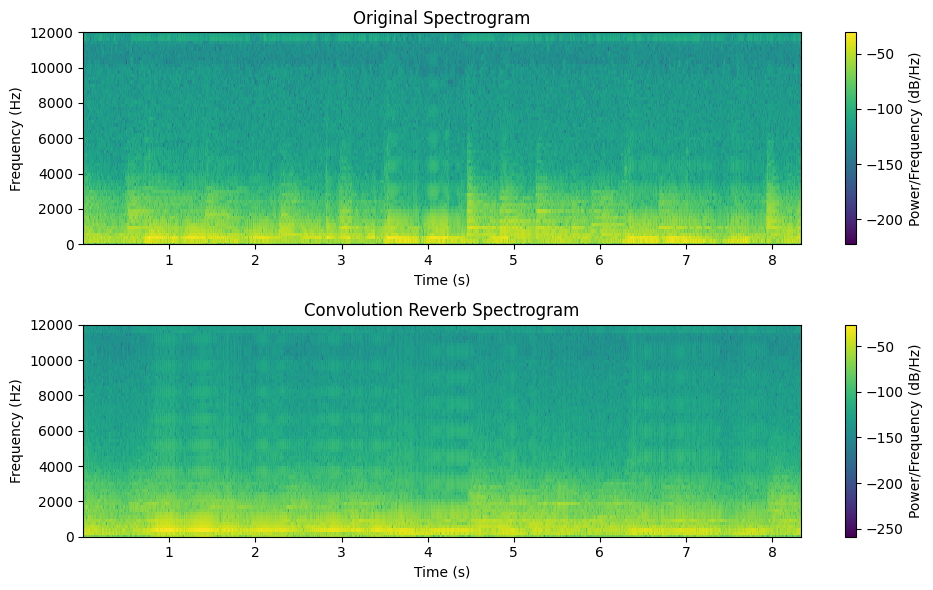

In [31]:
# Compute the spectrogram
frequencies_original, times_original, Sxx_original = signal.spectrogram(data[100000:500000,0], fs)

frequencies_conv, times_conv, Sxx_conv = signal.spectrogram(data_conv_IR_lobby[100000:500000,0], fs)

# Plot the spectrogram
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.pcolormesh(times_original, frequencies_original, 10 * np.log10(Sxx_original), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Original Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim([0, 12000])

plt.subplot(2, 1, 2)
plt.pcolormesh(times_conv, frequencies_conv, 10 * np.log10(Sxx_conv), shading='auto')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.title('Convolution Reverb Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.ylim([0, 12000])

plt.tight_layout()
plt.show()